# ERA SST Trends

## Read in nc files and upload single sst ds to zarr

In [1]:
import xarray as xr
import json
import gcsfs
import matplotlib.pyplot as plt

In [19]:
ds_uncleaned = xr.open_mfdataset('era/*.nc', engine='netcdf4')
ds_dropped = (ds_uncleaned.drop_vars(('number', 'expver')) - 273.15)
ds = ds_dropped.rename_dims({'valid_time':'time'})

In [20]:
ds

<xarray.Dataset> Size: 9GB
Dimensions:     (time: 367334, latitude: 57, longitude: 113)
Coordinates:
  * valid_time  (time) datetime64[ns] 3MB 1983-01-01 ... 2024-11-26T13:00:00
  * latitude    (latitude) float64 456B 31.0 30.75 30.5 ... 17.5 17.25 17.0
  * longitude   (longitude) float64 904B -100.0 -99.75 -99.5 ... -72.25 -72.0
Dimensions without coordinates: time
Data variables:
    sst         (time, latitude, longitude) float32 9GB dask.array<chunksize=(18992, 9, 19), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-30T21:21 GRIB to CDM+CF via cfgrib-0.9.1...

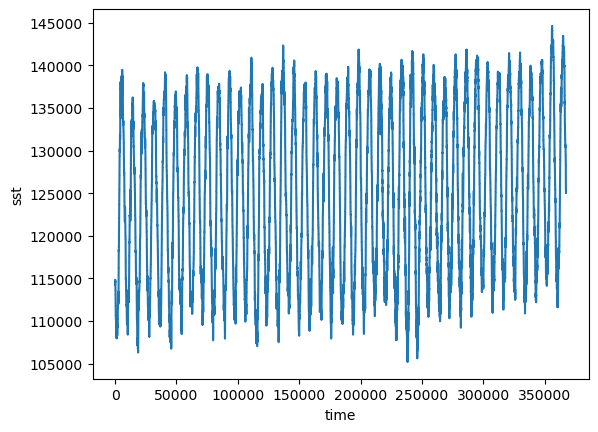

In [21]:
ds.sst.sum(['latitude', 'longitude']).plot()

In [39]:
ds.chunk({'latitude':-1, 'longitude':-1, 'time':11}).nbytes/1e9

9.466933208

In [38]:
ds.chunk({'latitude':-1, 'longitude':-1, 'time':11})

<xarray.Dataset> Size: 9GB
Dimensions:     (time: 367334, latitude: 57, longitude: 113)
Coordinates:
  * valid_time  (time) datetime64[ns] 3MB 1983-01-01 ... 2024-11-26T13:00:00
  * latitude    (latitude) float64 456B 31.0 30.75 30.5 ... 17.5 17.25 17.0
  * longitude   (longitude) float64 904B -100.0 -99.75 -99.5 ... -72.25 -72.0
Dimensions without coordinates: time
Data variables:
    sst         (time, latitude, longitude) float32 9GB dask.array<chunksize=(11, 57, 113), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-30T21:21 GRIB to CDM+CF via cfgrib-0.9.1...

In [40]:
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

gcsmap = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/GFDL/sst-1983_2024.zarr')
ds.chunk({'latitude':-1, 'longitude':-1, 'time':11}).to_zarr(gcsmap, mode='w')

Delete `.nc` files once upload to zarr is complete to free up LEAP data storage

## Recreate Figure 2 e)-h) panels in [Feng et al., 2023](https://www.sciencedirect.com/science/article/pii/S1674927823000953?via%3Dihub) paper

In [2]:
from dask_gateway import Gateway
g = Gateway()
cluster = g.connect(g.list_clusters()[0].name)
client = cluster.get_client()

In [3]:
client

Connection method: Cluster object,Cluster type: dask_gateway.GatewayCluster
Dashboard: /services/dask-gateway/clusters/prod.d3c63ede967b4069855251c006370e74/status,


In [4]:
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

ds = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/GFDL/sst-1983_2024.zarr'))

In [5]:
ds

<xarray.Dataset> Size: 9GB
Dimensions:     (latitude: 57, longitude: 113, time: 367334)
Coordinates:
  * latitude    (latitude) float64 456B 31.0 30.75 30.5 ... 17.5 17.25 17.0
  * longitude   (longitude) float64 904B -100.0 -99.75 -99.5 ... -72.25 -72.0
    valid_time  (time) datetime64[ns] 3MB dask.array<chunksize=(45917,), meta=np.ndarray>
Dimensions without coordinates: time
Data variables:
    sst         (time, latitude, longitude) float32 9GB dask.array<chunksize=(11, 57, 113), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    history:                 2024-11-30T21:21 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             European Centre for Medium-Range Weather Forecasts

In [6]:
ds.sst

<xarray.DataArray 'sst' (time: 367334, latitude: 57, longitude: 113)> Size: 9GB
dask.array<open_dataset-sst, shape=(367334, 57, 113), dtype=float32, chunksize=(11, 57, 113), chunktype=numpy.ndarray>
Coordinates:
  * latitude    (latitude) float64 456B 31.0 30.75 30.5 ... 17.5 17.25 17.0
  * longitude   (longitude) float64 904B -100.0 -99.75 -99.5 ... -72.25 -72.0
    valid_time  (time) datetime64[ns] 3MB dask.array<chunksize=(45917,), meta=np.ndarray>
Dimensions without coordinates: time

In [ ]:
sst = ds.sst.load()

In [7]:
ds.sst.sum(['latitude', 'longitude']).plot()

KeyboardInterrupt: 

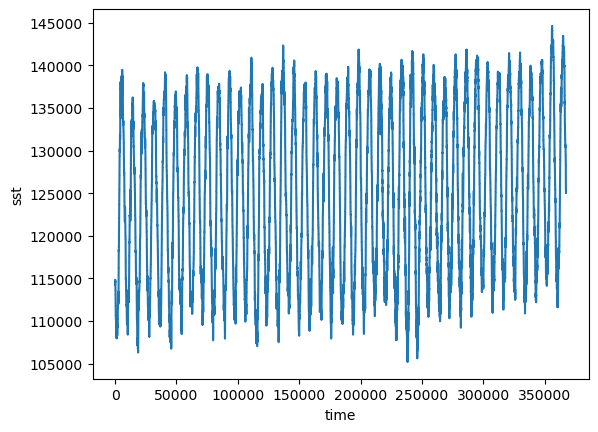

In [21]:
ds.sst.sum(['latitude', 'longitude']).plot()